In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# time series load
df = pd.read_csv('time_series_dataset.csv')

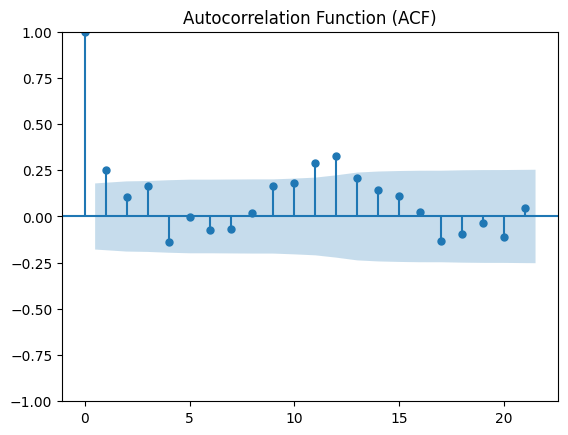

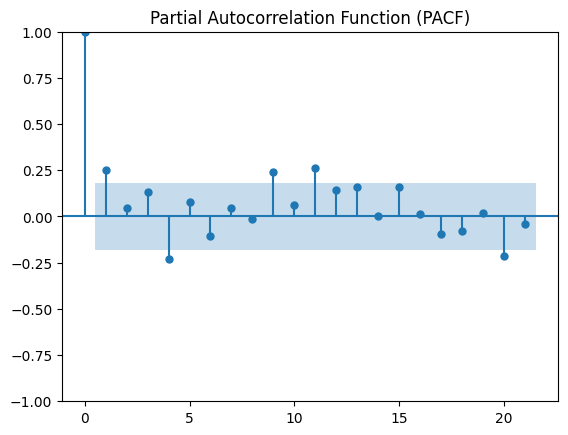

In [11]:
# Visual Inspection of ACF and PACF Plots:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF(q) and PACF(p)
plot_acf(df['Tshirt'])
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df['Tshirt'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [61]:
from pmdarima import auto_arima

# Automatically select the best ARIMA model
model = auto_arima(df['Tshirt'])
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -661.429
Date:                Wed, 13 Mar 2024   AIC                           1328.858
Time:                        22:52:49   BIC                           1337.195
Sample:                             0   HQIC                          1332.243
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7586      0.095     -8.021      0.000      -0.944      -0.573
ma.L2         -0.1813      0.095     -1.904      0.057      -0.368       0.005
sigma2      3872.3211    580.444      6.671      0.0

In [12]:
# Grid Method
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range of p, d, and q values
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, and q values
parameters = itertools.product(p_values, d_values, q_values)

# Fit ARIMA models for all combinations and select the best model
best_aic = float("inf")
best_params = None
for param in parameters:
    try:
        model = ARIMA(df['Tshirt'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)


c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\mahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best AIC: 1318.2046390683138
Best Parameters: (1, 1, 2)


In [40]:
tshirt_data = df['Tshirt']
train_size = int(len(tshirt_data) * 0.8)  # Use 80% of the data for training
train0_1, test0_1 = tshirt_data[:train_size], tshirt_data[train_size:]

In [53]:
# Example: Fit ARIMA model
model = ARIMA(tshirt_data, order=(1,1,2))  # Specify order (p, d, q)
fitted_model = model.fit()


In [51]:
# Example: Make forecasts
forecast = fitted_model.forecast(steps=12)  # Specify the number of forecast steps


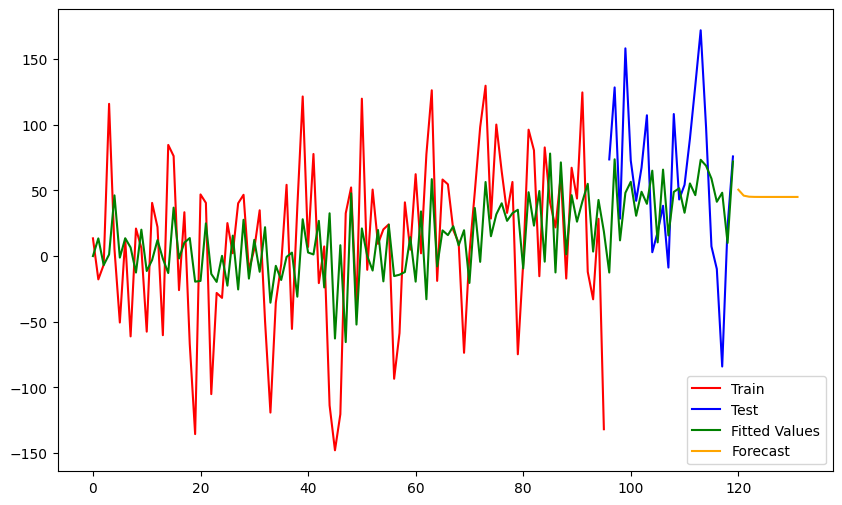

In [54]:
# Example: Visualize results
plt.figure(figsize=(10, 6))
plt.plot(train0_1.index, train0_1, label='Train', color='red')
plt.plot(test0_1.index, test0_1, label='Test',color='blue')
#plt.plot(tshirt_data, label='Original Data')
plt.plot(fitted_model.fittedvalues, color='green', label='Fitted Values')
plt.plot(forecast, color='orange', label='Forecast')
plt.legend()
plt.show()


In [59]:
forecast_values = fitted_model.forecast(steps=len(test0_1))

# Calculate Mean Absolute Error (MAE)
mae0_1 = mean_absolute_error(test0_1, forecast_values)
print(f"Mean Absolute Error (MAE): {mae0_1}")

# Calculate Mean Squared Error (MSE)
mse0_1 = mean_squared_error(test0_1, forecast_values)
print(f"Mean Squared Error (MSE): {mse0_1}")

rmse0_1 = np.sqrt(mse0_1)
print(f"Root Mean Squared Error (RMSE): {rmse0_1}")

Mean Absolute Error (MAE): 47.65765436748162
Mean Squared Error (MSE): 3515.1277101230207
Root Mean Squared Error (RMSE): 59.28851246340239
